## Essential Installations

In [ ]:
#installing pytorch
!pip3 install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 && pip3 install -r requirements.txt

## Essential Imports

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/sanishshrestha/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-10 Python-3.13.1 torch-2.7.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Model Testing

In [3]:
img = 'https://imgs.search.brave.com/w8afukNwzQA83AXLy0ZQJkKch5sZmRKFGMlX3D5THgE/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly9zdGF0/aWMudmVjdGVlenku/Y29tL3N5c3RlbS9y/ZXNvdXJjZXMvdGh1/bWJuYWlscy8wMjIv/NTcwLzg4Ni9zbWFs/bC9jYXItdHJhZmZp/Yy1qYW0tb24tdGhl/LWhpZ2h3YXktaW50/ZW5zaXZlLXRyYWZm/aWMtc2VsZWN0aXZl/LWZvY3VzLW5vaXNl/LWVmZmVjdC10aW1l/LWxhcHNlLWZyZWUt/dmlkZW8uanBn'

In [4]:
results = model(img)
results.print()

/Users/sanishshrestha/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 200x356 19 cars, 3 buss, 4 trucks
Speed: 110.7ms pre-process, 30.1ms inference, 4.8ms NMS per image at shape (1, 3, 384, 640)


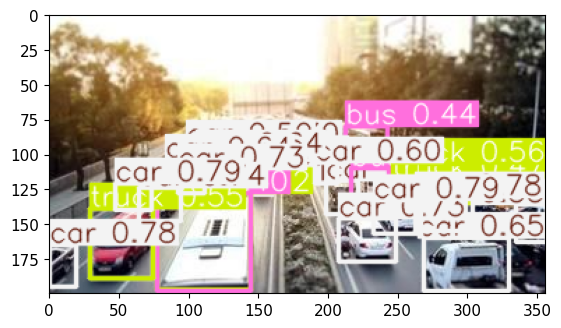

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## Real Time Detections

In [6]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret,frame = cap.read()

    #Make Detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

## Train from Scratch

In [7]:
import uuid
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [ ]:
cap = cv2.VideoCapture(1)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(10)

    for img_num in range(number_imgs):
        print('Collecting images for {}, image number{}'.format(label, img_num))

        #Webcam Feed
        ret,frame = cap.read()

        #Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #Writes out image to file
        cv2.imwrite(imgname, frame)

        #Render to the screen
        cv2.imshow('Image Collection', frame)
        
        #2 second delay between captures
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


cap.release()
cv2.destroyAllWindows()

In [59]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [ ]:
!pip3 install pyqt5 lxml # Install qt and lxml by pip

make qt5py3
python3 labelImg.py
python3 labelImg.py [IMAGE_PATH] [PRE-DEFINED CLASS FILE]

In [61]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

## Real Time Detection

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp3/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/sanishshrestha/.cache/torch/hub/master.zip


YOLOv5 🚀 2025-7-11 Python-3.13.1 torch-2.7.1 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [20]:
drowsy_img = os.path.join('data/test/drowsy.jpg')
awake_img = os.path.join('data/test/awake.jpg')

image 1/1: 1080x1920 1 drowsy
Speed: 29.1ms pre-process, 38.2ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)


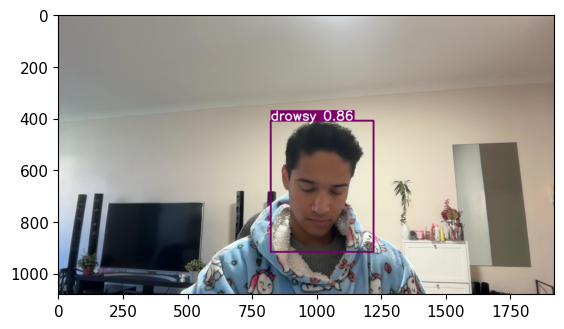

In [18]:
results = model(drowsy_img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

image 1/1: 1080x1920 1 awake
Speed: 27.7ms pre-process, 37.8ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)


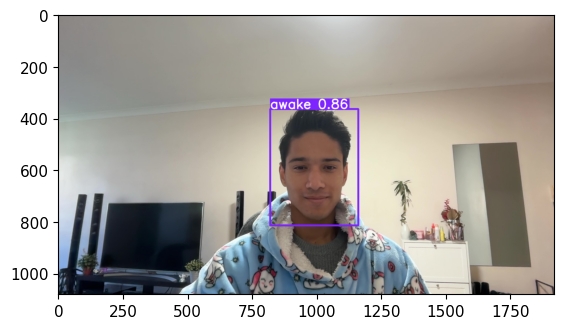

In [21]:
results = model(awake_img)
results.print()
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [22]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()

    results = model(frame)

    cv2.imshow('Drowsiness Detection', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()